ITEC 6720 Assignment 5 
Chapter 5 : Plotting With Pandas 
Rachel Buchanan

## Data 

-Facebook's stock price (2018)
-Earthquake data (September 18, 2018 - October 13, 2018)
-European Centre for Disease Prevention & Control's (ECDC) 

## Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

| Parameter | Purpose | Data Type |
| --- | --- | --- |
| `kind` | Determines the plot type | String |
| `x`/`y` | Column(s) to plot on the *x*-axis/*y*-axis | String or list |
| `ax` | Draws the plot on the `Axes` object provided | `Axes` |
| `subplots` | Determines whether to make subplots | Boolean |
| `layout` | Specifies how to arrange the subplots | Tuple of `(rows, columns)` |
| `figsize` | Size to make the `Figure` object | Tuple of `(width, height)` | 
| `title` | The title of the plot or subplots | String for the plot title or a list of strings for subplot titles |
| `legend` | Determines whether to show the legend | Boolean |
| `label` | What to call an item in the legend | String if a single column is being plotted; otherwise, a list of strings |
| `style` | `matplotlib` style strings for each item being plotted | String if a single column is being plotted; otherwise, a list of strings |
| `color` | The color to plot the item in | String or red, green, blue tuple if a single column is being plotted; otherwise, a list |
| `colormap` | The colormap to use | String or `matplotlib` colormap object |
| `logx`/`logy`/`loglog` | Determines whether to use a logarithmic scale for the *x*-axis, *y*-axis, or both | Boolean |
| `xticks`/`yticks` | Determines where to draw the ticks on the *x*-axis/*y*-axis | List of values |
| `xlim`/`ylim` | The axis limits for the *x*-axis/*y*-axis | Tuple of the form `(min, max)` |
| `rot` | The angle to write the tick labels at | Integer |
| `sharex`/`sharey` | Determines whether to have subplots share the *x*-axis/*y*-axis | Boolean |
| `fontsize` | Controls the size of the tick labels | Integer |
| `grid` | Turns on/off the grid lines | Boolean |

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

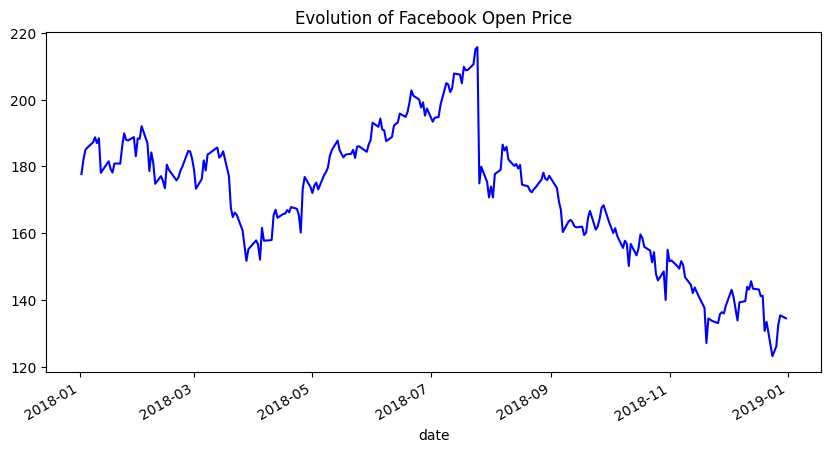

In [3]:
# evolution - over time
#
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolution of Facebook Open Price'
)

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

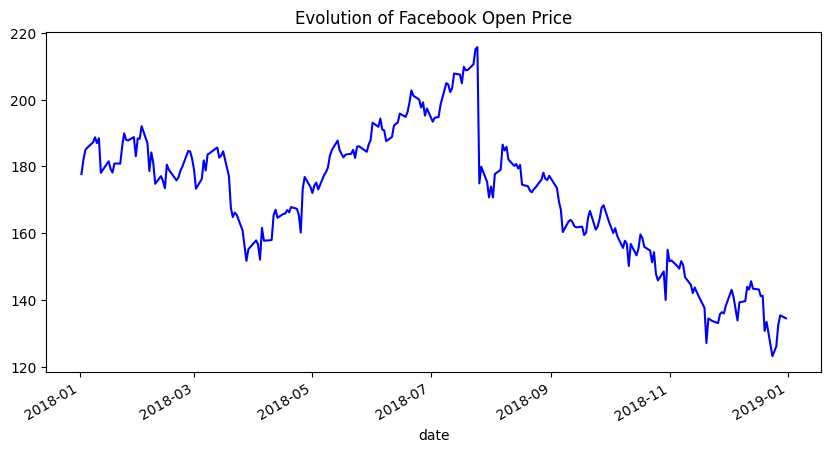

In [4]:
# color & linestyle
#
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='blue',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

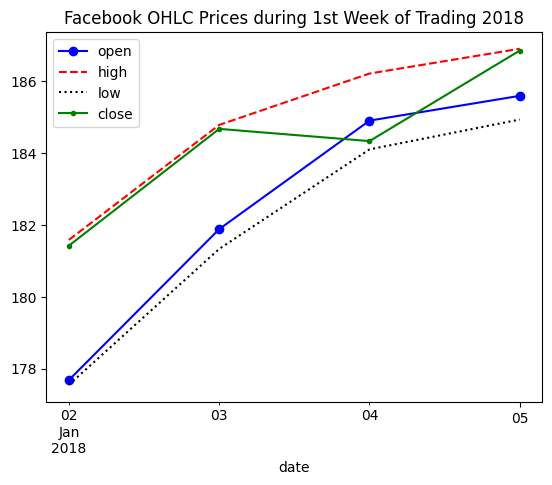

In [5]:
# plot lines 
#
fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

## Creating Subplots - subplots=true - plot()

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

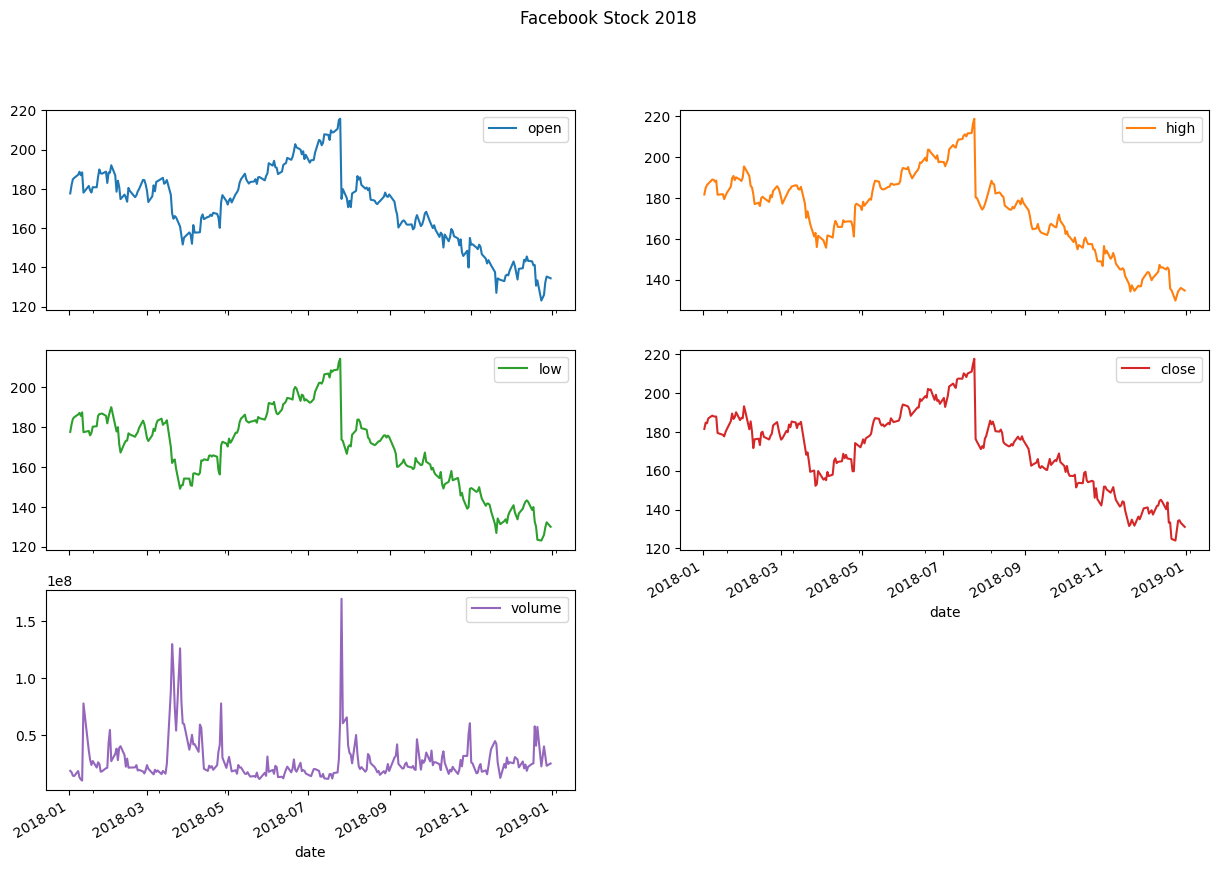

In [6]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

In [7]:
# ax parameter 
#
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

<AxesSubplot:xlabel='date'>

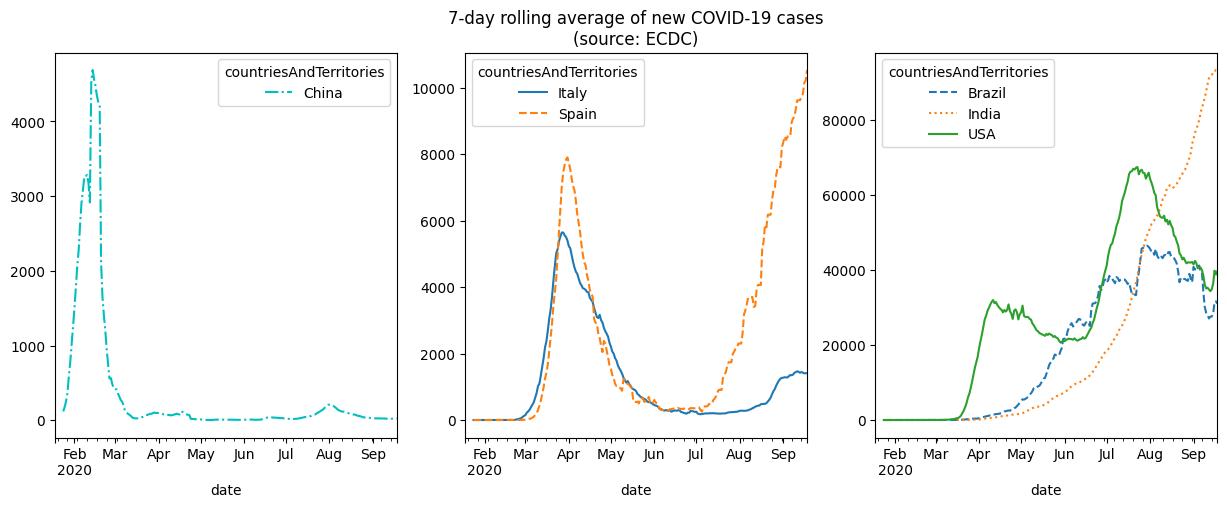

In [8]:
# moving average - rolling()
#
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

<AxesSubplot:title={'center':'7-day rolling average of new COVID-19 cases\n(source: ECDC)'}, xlabel='date'>

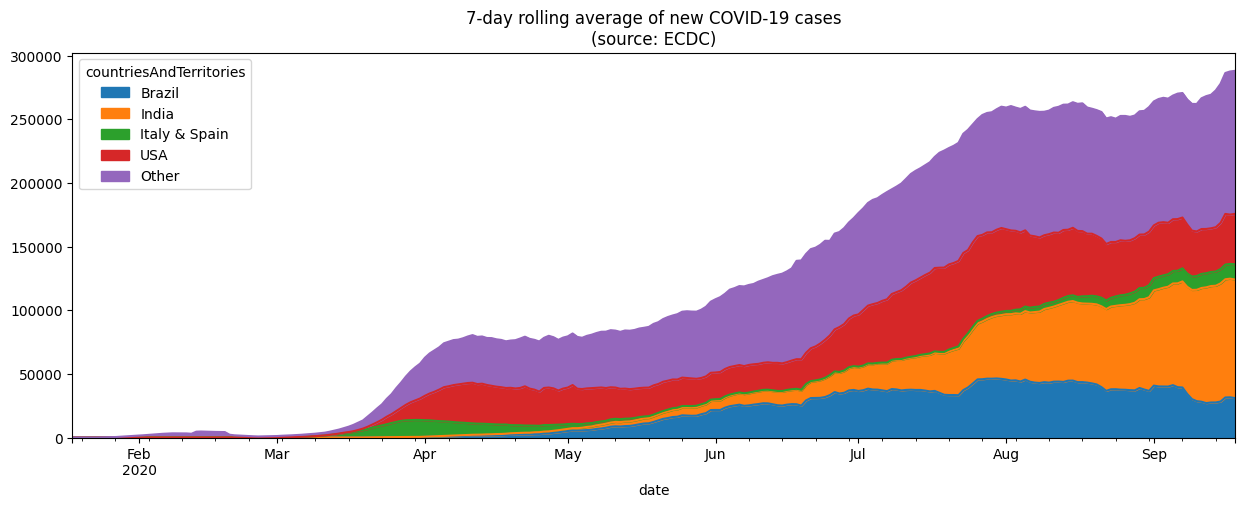

In [9]:
# area plot 
#
plot_cols = ['Brazil', 'India', 'Italy & Spain', 'USA', 'Other']
grouped = ['Italy', 'Spain']
other_cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in plot_cols
]

new_cases_rolling_average.sort_index(axis=1).assign(
    **{
        'Italy & Spain': lambda x: x[grouped].sum(axis=1),
        'Other': lambda x: x[other_cols].drop(columns=grouped).sum(axis=1)
    }
)[plot_cols].plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

<AxesSubplot:xlabel='date'>

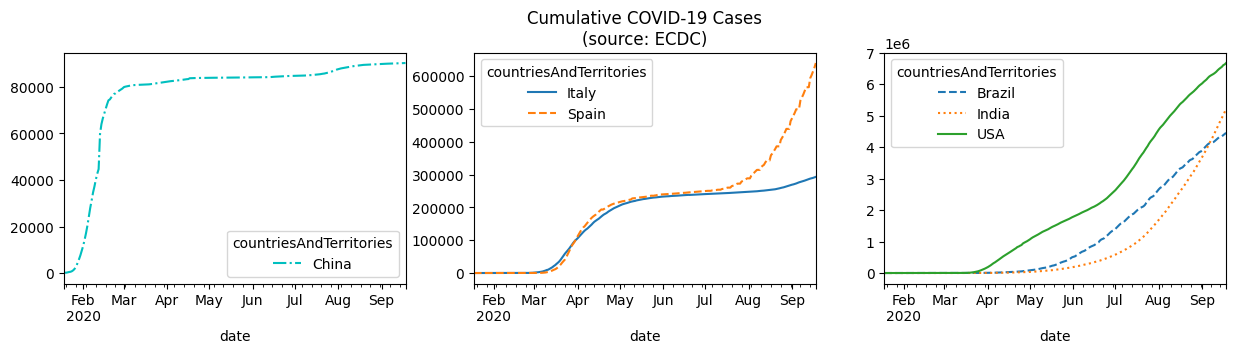

In [10]:
# evolution over time - subplots 
#
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]
).cases.sum().unstack(0).apply('cumsum')

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='Cumulative COVID-19 Cases\n(source: ECDC)'
)
cumulative_covid_cases[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

## Visual Representation of Relationships between Variables 

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

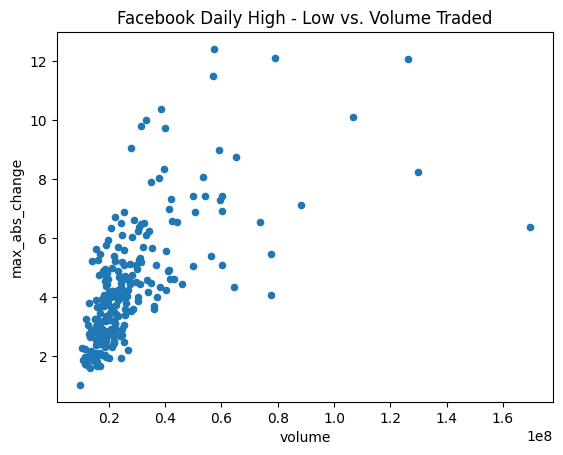

In [11]:
# kind = scatter 
#
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

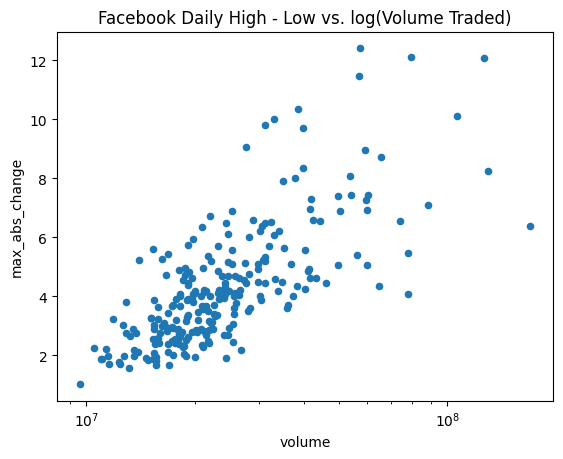

In [12]:
# pandas - logx = true
#
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)', 
    logx=True
)

# alpha - Adding Transparency 

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

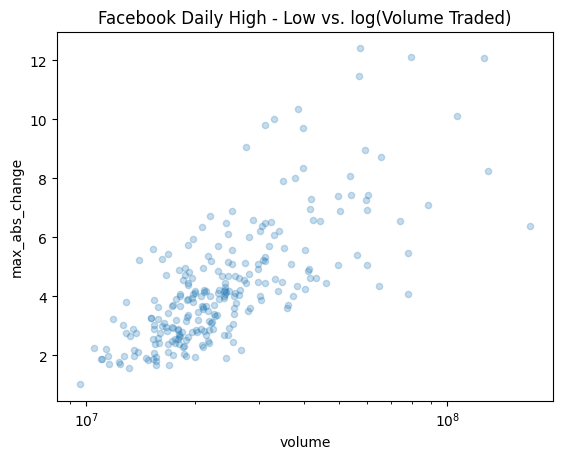

In [13]:
# fix overlapping values 
#
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

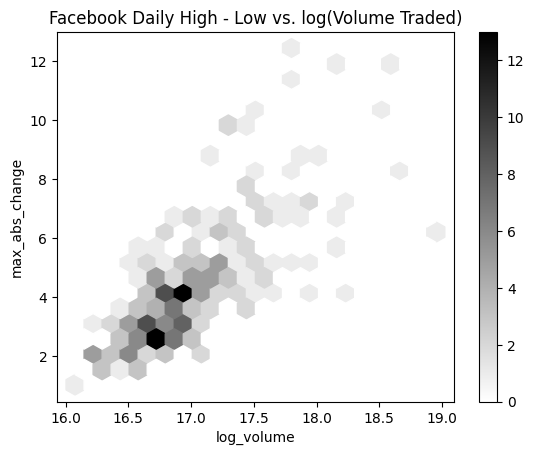

In [14]:
# hexbins - divide plots in to hexagons
#
fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20, 
    sharex=False # we have to pass this to see the x-axis
)


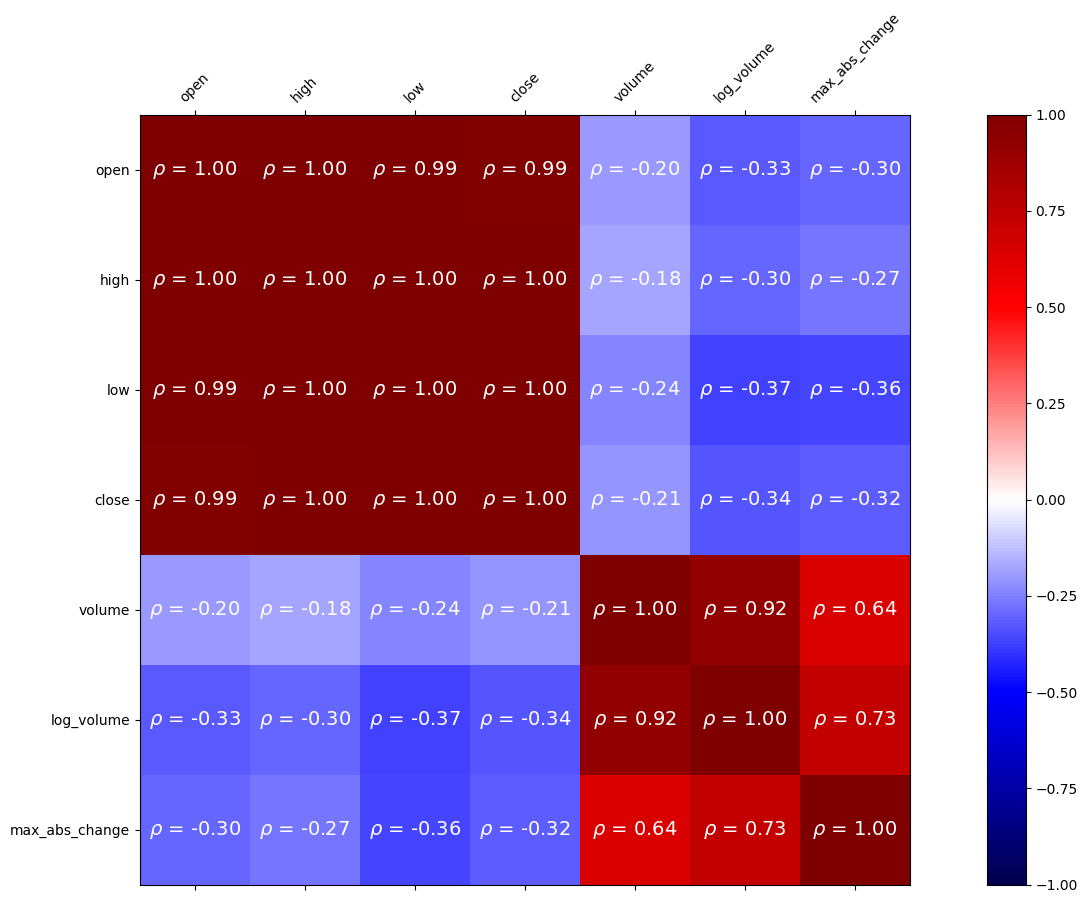

In [15]:
# visual correlations - heatmaps
#
fig, ax = plt.subplots(figsize=(20, 10))
# correlation matrix calc
#
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()
# create heatmap & colorbar
#
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)
# label ticks - column names
#
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) 
# bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) 
# bug in matplotlib
ax.set_yticklabels(labels)
# include value of correlation coefficient in boxes
#
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
    )

In [16]:
# accessing values
#
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

## Visualizing Distributions

*Histograms* : distribution of a data set

Text(0.5, 0, 'Traded Volume')

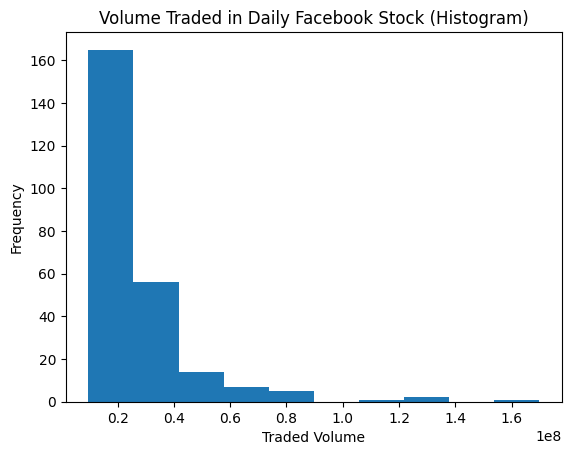

In [20]:
# histogram
#
fb.volume.plot(
    kind='hist', 
    title='Volume Traded in Daily Facebook Stock (Histogram)'
)
# label x-axis 
#
plt.xlabel('Traded Volume') 

Text(0.5, 0, 'Magnitude')

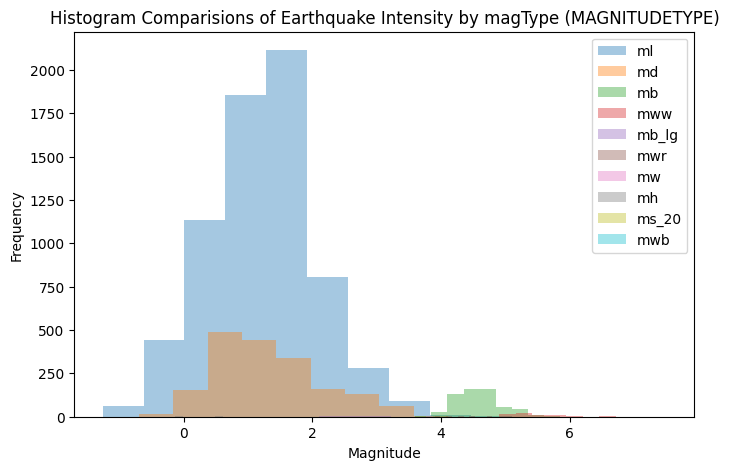

In [25]:
# overlap histograms 
#
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=magtype, legend=True,
            title='Histogram Comparisions of Earthquake Intensity by magType (MAGNITUDETYPE)'
        )
# label x-axis
#
plt.xlabel('Magnitude')

Text(0.5, 0, 'Price - ($)')

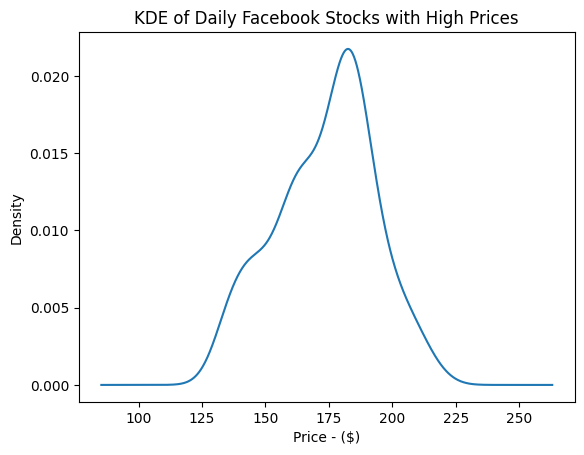

In [26]:
# KDE - kernel density estimation
#
fb.high.plot(
    kind='kde', 
    title='KDE of Daily Facebook Stocks with High Prices'
)
# label x-axis
#
plt.xlabel('Price - ($)') 

*Adding to the result - plot()

Text(0.5, 0, 'Price - ($)')

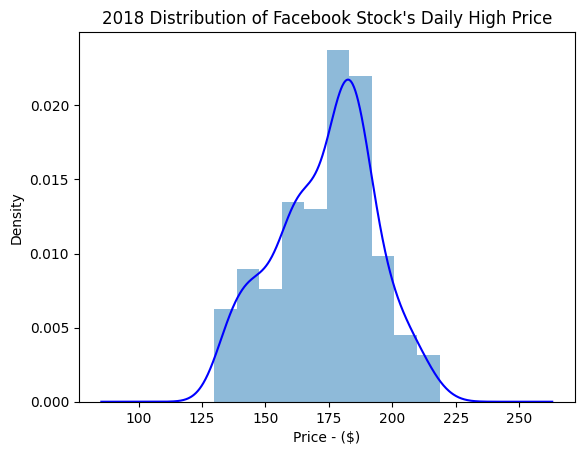

In [27]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='2018 Distribution of Facebook Stock\'s Daily High Price'
)
# label x-axis
#
plt.xlabel('Price - ($)') 

Text(0.5, 1.0, 'ECDF of Earthquake Magnitude with magType ml (MEASUREOFMAGNITUDE)')

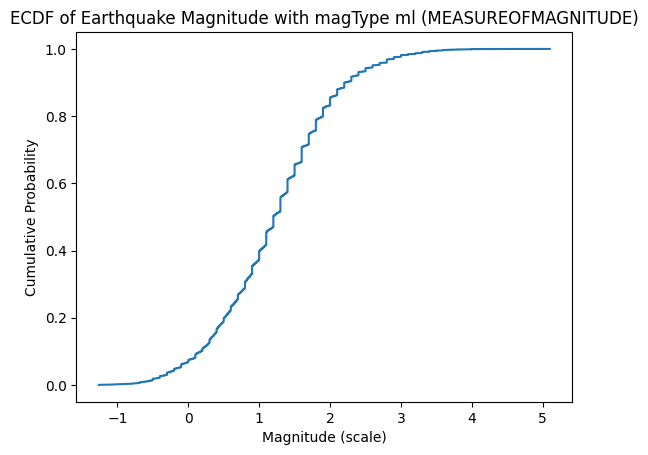

In [30]:
# ECDF - CDF 
#
from statsmodels.distributions.empirical_distribution import ECDF
#
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
#
# axis labels 
# add x-axis label
#
plt.xlabel('Magnitude (scale)')  
# add y-axis label
#
plt.ylabel('Cumulative Probability') 
# add title 
#
plt.title('ECDF of Earthquake Magnitude with magType ml (MEASUREOFMAGNITUDE)')

Text(0.5, 1.0, ' Probability - P(mag <= 3) = 98%')

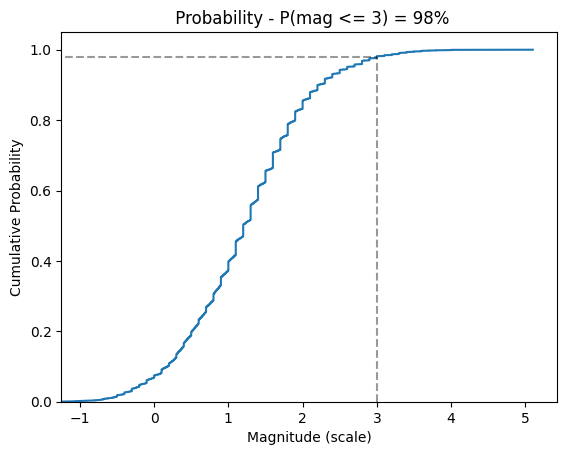

In [33]:
# probability 
#
from statsmodels.distributions.empirical_distribution import ECDF
#
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# axis labels
# add x-axis label 
#
plt.xlabel('Magnitude (scale)') 
# add y-axis label
#
plt.ylabel('Cumulative Probability') 
# add reference lines for mag <= 3 
#
plt.plot(
    [3, 3], [0, .98], '--k', 
    [-1.5, 3], [0.98, 0.98], '--k', alpha=0.4
)
# set axis ranges
#
plt.ylim(0, None)
plt.xlim(-1.25, None)
# add a title
#
plt.title(' Probability - P(mag <= 3) = 98%')

## Boxplots - graphical representation of dataset - box-and-whisker plot

Text(0, 0.5, 'Price - ($)')

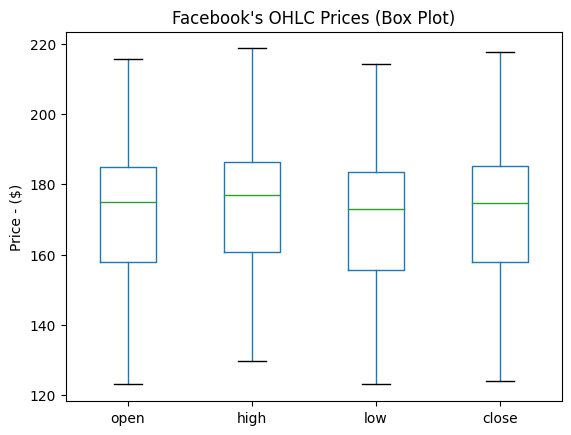

In [36]:
# boxplot
#
fb.iloc[:,:4].plot(kind='box', title='Facebook\'s OHLC Prices (Box Plot)')
plt.ylabel('Price - ($)') # label the y-axis

Text(0, 0.5, 'Price - ($)')

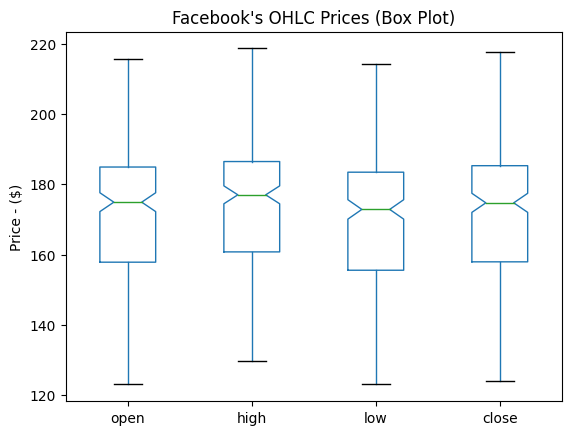

In [39]:
# notched boxplot
#
fb.iloc[:,:4].plot(kind='box', title='Facebook\'s OHLC Prices (Box Plot)', notch=True)
# label the y-axis
#
plt.ylabel('Price - ($)') 

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

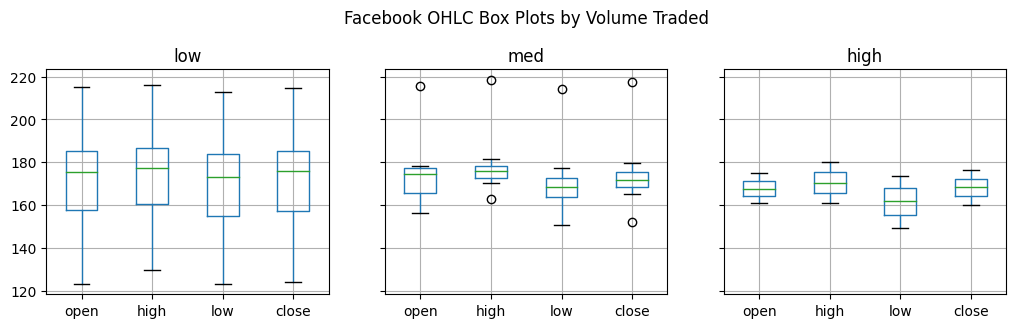

In [40]:
# volume boxplot
#
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

Text(0, 0.5, 'magnitude')

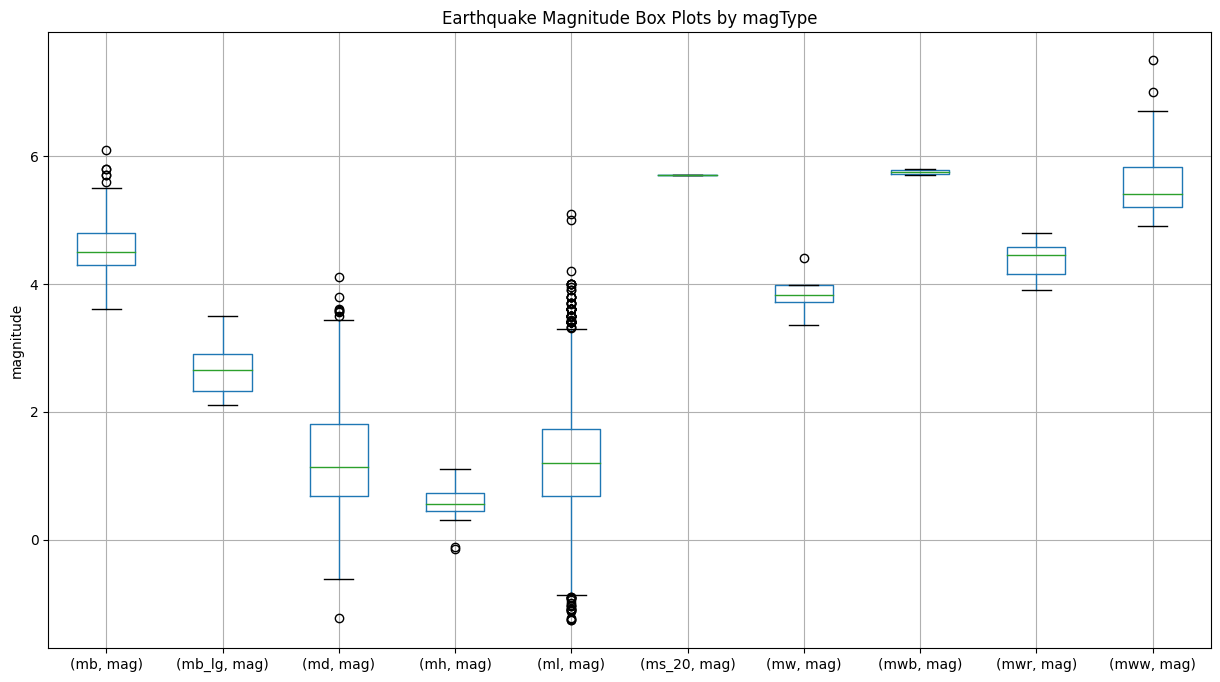

In [41]:
# distribution of mag
#
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType')
# label y-axis
#
plt.ylabel('magnitude')

## Counts && Frequency

*BarCharts -  rectangular bars or columns to display the values of different categories or groups

Text(0.5, 0, '# of Earthquakes')

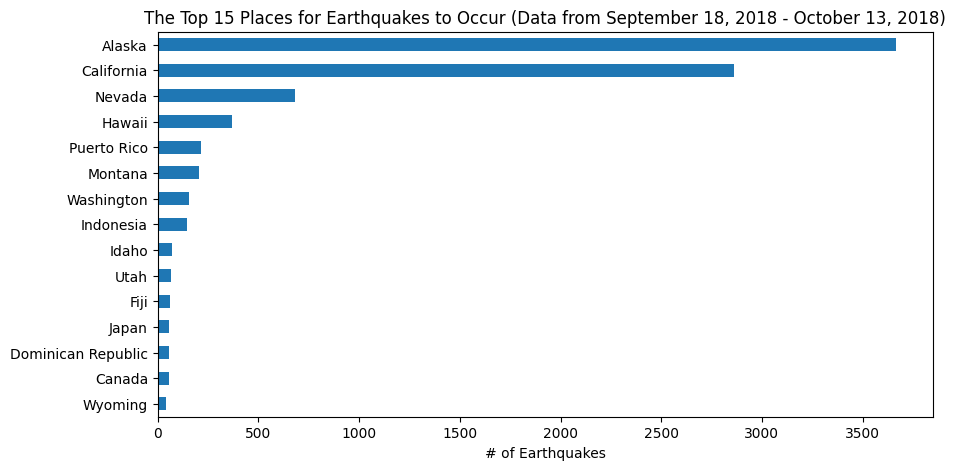

In [47]:
# kind='barh' - horizontal bars 
# kind='bar' - vertical bars
#
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='The Top 15 Places for Earthquakes to Occur '
          '(Data from September 18, 2018 - October 13, 2018)'
)
# label the x-axis
#
plt.xlabel('# of Earthquakes') 

Text(0.5, 0, '# of Tsunamis')

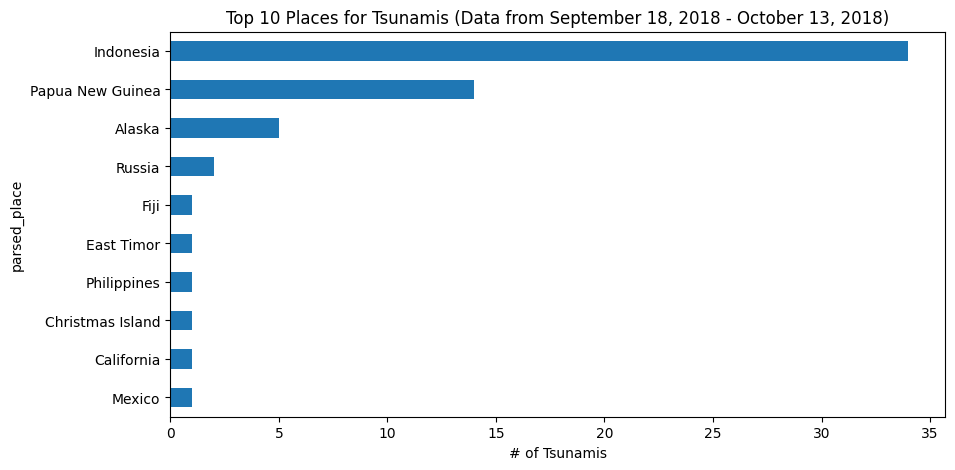

In [48]:
# accompanied by tsunamis results
#
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10, 5), 
    title='Top 10 Places for Tsunamis '
          '(Data from September 18, 2018 - October 13, 2018)'
) 
# label the x-axis
#
plt.xlabel('# of Tsunamis')

Text(0, 0.5, 'Count # ')

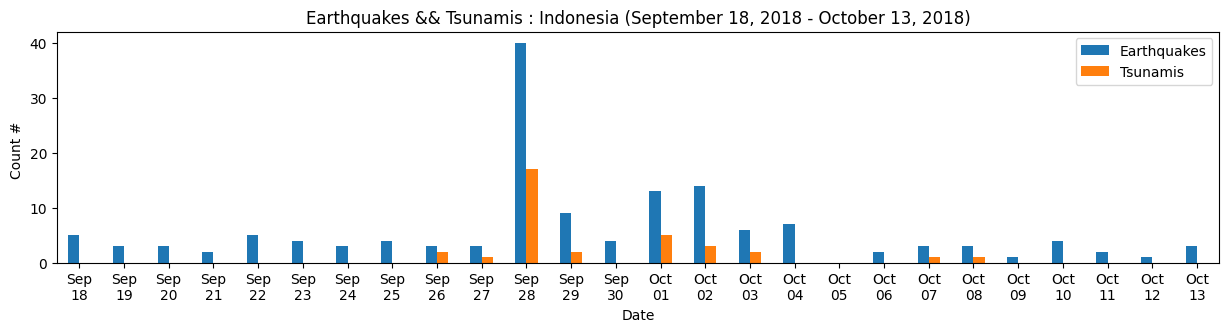

In [54]:
# indonesia 
#
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()
# format the datetimes - index - x-axis
#
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
#
indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['Earthquakes', 'Tsunamis'], 
    title='Earthquakes && Tsunamis : Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)
# label the x & y axis
#
plt.xlabel('Date')
plt.ylabel('Count # ')

## Grouped Bars - cluster bar charts

Text(0, 0.5, 'Count #')

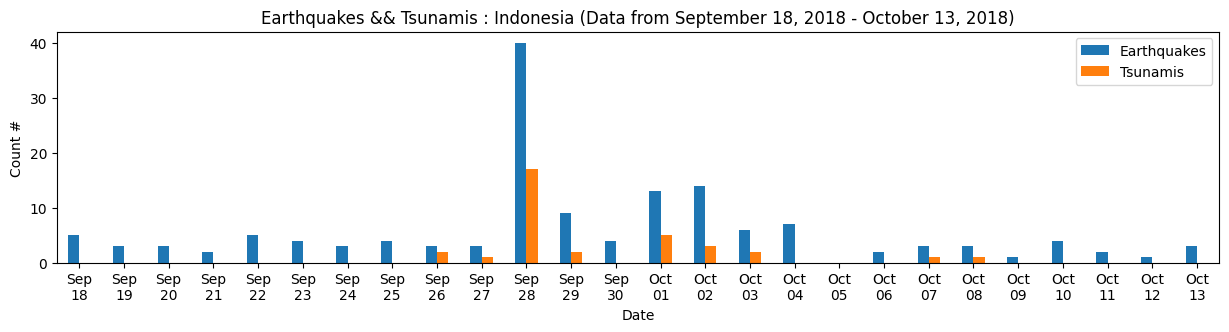

In [56]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
#
indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['Earthquakes', 'Tsunamis'], 
    title='Earthquakes && Tsunamis : Indonesia '
          '(Data from September 18, 2018 - October 13, 2018)'
)
# label the x & y axis
#
plt.xlabel('Date')
plt.ylabel('Count #')

Text(0, 0.5, 'Earthquakes')

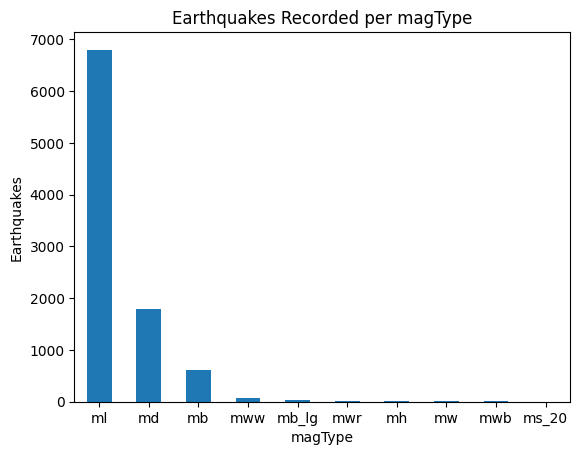

In [63]:
# shorter bar labels 
#
quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)
# label the x & y axis
#
plt.xlabel('magType')
plt.ylabel('Earthquakes')

<AxesSubplot:title={'center':'Earthquakes by integer magnitude and magType'}, xlabel='mag_bin', ylabel='earthquakes'>

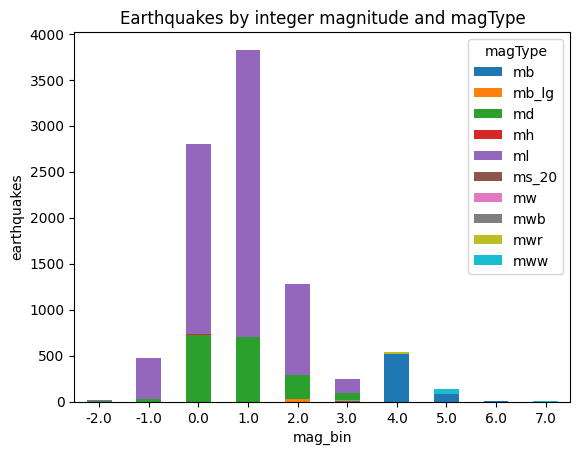

In [64]:
# stacked bars
#
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
    stacked=True, rot=0, ylabel='earthquakes', 
    title='Earthquakes by integer magnitude and magType'
)

Text(0, 0.5, 'percentage')

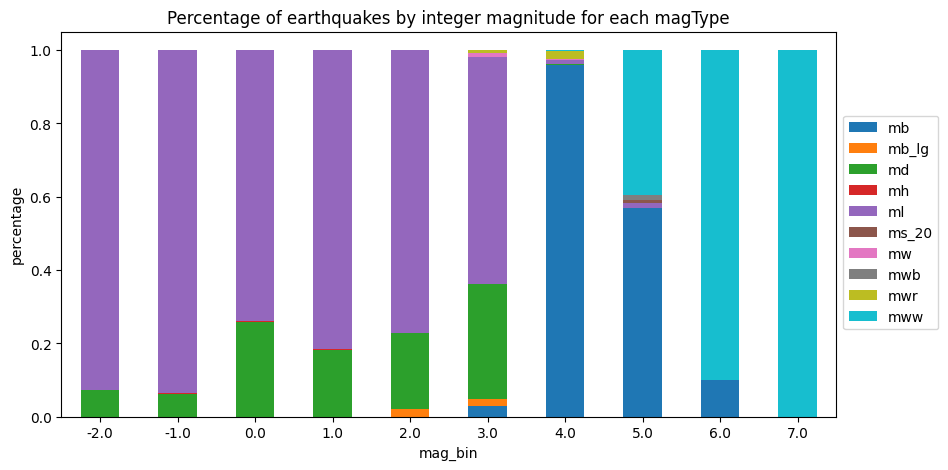

In [65]:
# normalized stacked bars
#
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
# move legend to right of  plot
#
ax.legend(bbox_to_anchor=(1, 0.8)) 
# label the y-axis
#
plt.ylabel('percentage') 

Text(0, 0.5, '')

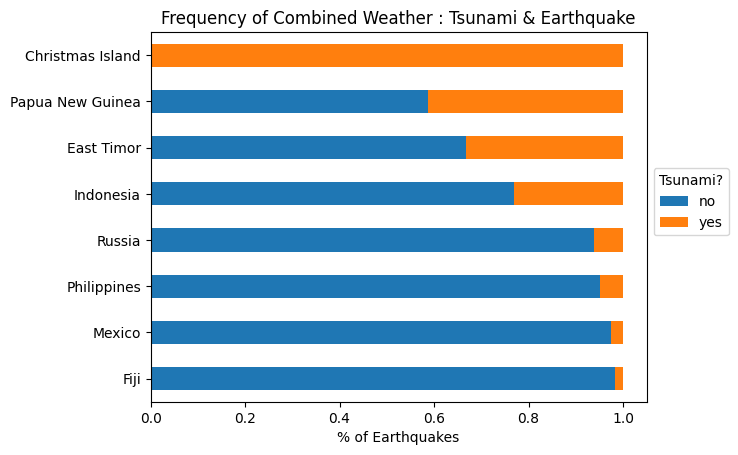

In [66]:
# horizontally stacked
#
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of Combined Weather : Tsunami & Earthquake', 
        stacked=True
    )
# move legend to right of plot
#
plt.legend(title='Tsunami?', bbox_to_anchor=(1, 0.65))
# label the axes 
#
plt.xlabel('% of Earthquakes')
plt.ylabel('')